**Brian Blaylock**  
**June 26, 2020**  

🌐 HRRR Archive Website: http://hrrr.chpc.utah.edu/  
🚑 Support: atmos-mesowest@lists.utah.edu  
📧 Brian Blaylock: blaylockbk@gmail.com  
✒ Citation this details:
> Blaylock B., J. Horel and S. Liston, 2017: Cloud Archiving and Data Mining of High Resolution Rapid Refresh Model Output. Computers and Geosciences. 109, 43-50. https://doi.org/10.1016/j.cageo.2017.08.005

---

# 🏗 HRRR Download Demo: Part 4
## Opening GRIB2 files in Python with `xarray` and `cfgrib`

- [Part 1: How to download a bunch of HRRR grib2 files (full file)](./demo_download_hrrr_archive_part1.ipynb)
- [Part 2: How to download a subset of variables from a HRRR file](./demo_download_hrrr_archive_part2.ipynb)
- [Part 3: A function that can download many full files, or subset of files](./demo_download_hrrr_archive_part3.ipynb)
- [Part 4: Opening GRIB2 files in Python with xarray and cfgrib](./demo_download_hrrr_archive_part4.ipynb)

---

When it comes to reading GRIB2 files in Python, you have two options: 1) `pygrib` and 2) `cfgrib`. These have recently been made available on the Windows PC, which is aweseom.

The benefit of `cfgrib` is it's ability to read HRRR files as an xarray dataset.


### 📔 **Before you get started, I recommend you review the documentation for [cfgrib](https://github.com/ecmwf/cfgrib) and [xarray](http://xarray.pydata.org/en/stable/).**

---

Note: Instead of putting the long download functions in a cell, I will import the function from the file `HRRR_archive.py`.

In [1]:
import os
import re
from datetime import datetime, timedelta

import numpy as np
import urllib.request  # Used to download the file
import requests        # Used to check if a URL exists
import warnings
import pandas as pd    # Just used for the date_range function
import matplotlib.pyplot as plt

import xarray as xr
import cfgrib



In [2]:
import cartopy.crs as ccrs


In [3]:
# from HRRR_archive import download_HRRR  # HRRR_archive.py needs to me in your current directory or PYTHONPATH
from hrrrb.archive import download_hrrr, xhrrr

In [4]:
print('cfgrib version:', cfgrib.__version__)
print('xarray version:', xr.__version__)

cfgrib version: 0.9.8.5
xarray version: 0.16.2


I'm just going to work with one GRIB2 file--the six-hour forecast (F06) from the 12:00 UTC 15 June 2020 run for the U and V wind components.

In [7]:
# DATE = datetime(2020, 6, 15, 12)
# myfile = download_HRRR(DATE, fxx=6, searchString=':(U|V)GRD:10 m')

In [4]:
#myfile

'./subset_20200615_hrrr.t12z.wrfsfcf06.grib2'

Now we can open the file in xarry with the cfgrib engine.

Try downloading chunks of data that correspond to these datasets

In [5]:
# Set the start and end date for the HRRR files we want to download
# sDATE = datetime(2020, 4, 24)
# eDATE = datetime(2020, 4, 24, 3)

sDATE = datetime(2019, 9, 25)
eDATE = datetime(2019, 9, 26, 23)

# Create a list of datetimes we want to download with Pandas `date_range` function.
# The HRRR model is run every hour, so make a list of every hour
DATES = pd.date_range(sDATE, eDATE, freq='1H')
DATES

DatetimeIndex(['2019-09-25 00:00:00', '2019-09-25 01:00:00',
               '2019-09-25 02:00:00', '2019-09-25 03:00:00',
               '2019-09-25 04:00:00', '2019-09-25 05:00:00',
               '2019-09-25 06:00:00', '2019-09-25 07:00:00',
               '2019-09-25 08:00:00', '2019-09-25 09:00:00',
               '2019-09-25 10:00:00', '2019-09-25 11:00:00',
               '2019-09-25 12:00:00', '2019-09-25 13:00:00',
               '2019-09-25 14:00:00', '2019-09-25 15:00:00',
               '2019-09-25 16:00:00', '2019-09-25 17:00:00',
               '2019-09-25 18:00:00', '2019-09-25 19:00:00',
               '2019-09-25 20:00:00', '2019-09-25 21:00:00',
               '2019-09-25 22:00:00', '2019-09-25 23:00:00',
               '2019-09-26 00:00:00', '2019-09-26 01:00:00',
               '2019-09-26 02:00:00', '2019-09-26 03:00:00',
               '2019-09-26 04:00:00', '2019-09-26 05:00:00',
               '2019-09-26 06:00:00', '2019-09-26 07:00:00',
               '2019-09-

In [6]:
#commenting out after downloading
#set verbose to false next time

#subset variables
# download_hrrr(DATES, searchString=':(|HGT|TMP|SPFH|VVEL|UGRD|VGRD|LAND|TSOIL|SOILW|):',
#               fxx=[0], field='prs',dryrun=False,
#               save_dir='/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB')

#download full
download_hrrr(DATES,fxx=[0], field='prs',dryrun=False,
              save_dir='/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr')

👨🏻‍🏭 Created directory: [/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr]
💡 Info: Downloading [48] GRIB2 files

👨🏻‍🏭 Created directory: [/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926]
✅ Success! Downloaded from [google] https://storage.googleapis.com/high-resolution-rapid-refresh/hrrr.20190925/conus/hrrr.t00z.wrfprsf00.grib2 --> /mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t00z.wrfprsf00.grib2
🚛💨 Download Progress: [1/48 completed] >> Est. Time Remaining 0:30:59.531077  

✅ Success! Downloaded from [google] https://storage.googleapis.com/high-resolution-rapid-refresh/hrrr.20190925/conus/hrrr.t01z.wrfprsf00.grib2 --> /mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t01z.wrfprsf00.grib2
🚛💨 Download Progress: [2/48 completed] >> Est. Time Remaining 0:29:21.601004  

✅ Success! Downloaded from [google] https://storage.goo

(array([PosixPath('/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t00z.wrfprsf00.grib2'),
        PosixPath('/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t01z.wrfprsf00.grib2'),
        PosixPath('/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t02z.wrfprsf00.grib2'),
        PosixPath('/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t03z.wrfprsf00.grib2'),
        PosixPath('/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t04z.wrfprsf00.grib2'),
        PosixPath('/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t05z.wrfprsf00.grib2'),
        PosixPath('/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/hrrr/20190926/20190925_hrrr.t06z.wrfprsf00.grib2'),
      

In [ ]:
#ds = cfgrib.open_datasets(file, backend_kwargs={'indexpath':''})

Subsetting over a 300x300km domain for Ches

In [6]:
%%bash
pwd

/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB


In [ ]:
#test
# %%bash
# wgrib2 hrrr/20190924/subset_20190924_hrrr.t01z.wrfprsf00.grib2 -small_grib -92.25:-88.28 44.53:47.29 hrrr/20190924/check.grib2

In [13]:
# %%bash
# FILES=hrrr/20190926/data/*.grib2
# for f in $FILES; do 
#     echo  "Processing $f ";
#     # do something on $f
#     FULL_FILENAME=$f
#     FILENAME=${FULL_FILENAME##*/}
#     suffix='.small'
#     echo ${FILENAME%.*}$suffix
#     DIR=${PWD##*/}
#     echo $DIR
#     wgrib2 $f -small_grib -92.25:-88.28 44.53:47.29 hrrr/20190926/data/${FILENAME%.*}${suffix}.grib2
# done



Convert to netcdf

In [14]:
#test
# %%bash
# ncl_convert2nc hrrr/20190924/check.grib2 -itime -o hrrr/20190924

In [11]:
# %%bash
# FILES=hrrr/20190926/data/*small.grib2
# for f in $FILES; do 
#     echo  "Processing $f ";
#     # do something on $f
#     FULL_FILENAME=$f
#     FILENAME=${FULL_FILENAME##*/}
#     #suffix='.small'
#     echo ${FILENAME%.*}
#     ncl_convert2nc $f -itime -o hrrr/20190926/data
    
# done


In [ ]:
%%bash
wgrib2 hrrr/20190924/subset_20190924_hrrr.t01z.wrfprsf00.grib2 -small_grib -92.25:-88.28 44.53:47.29 hrrr/20190924/small2.grib2

In [36]:
file = '/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/ches_forcings/HRRRB/hrrr/20190924/subset_20190924_hrrr.t00z.wrfprsf00.grib2'
ds = cfgrib.open_datasets(file, backend_kwargs={'indexpath':''})


Try and opne only the variables you need with cfgrib

In [10]:
xr.open_dataset('hrrr/20190924/20190924_hrrr.t00z.wrfprsf00.grib2', engine='cfgrib',
...     backend_kwargs={'filter_by_keys': {'typeOfLevel': 'isobaricInhPa'}})
#takes less time!

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 40, x: 1799, y: 1059)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 1013 1000 975 950 925 ... 125 100 75 50
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    gh             (isobaricInhPa, y, x) float32 ...
    t              (isobaricInhPa, y, x) float32 ...
    r              (isobaricInhPa, y, x) float32 ...
    dpt            (isobaricInhPa, y, x) float32 ...
    q              (isobaricInhPa, y, x) float32 ...
    w              (isobaricInhPa, y, x) float32 ...
    u              (isobaricInhPa, y, x) float32 ...
    v              (isobaricInhPa, y, x) float32 ...
    absv           (isobaricInhPa, y, x) float32 ...
    clwmr          (isobaricInhPa, y, x) float32 ...
    paramId_0      (isobaricInhPa, y, x) float32 ...
    rwmr           (isobaricInhPa, y, x) float32 ...
    snmr           (isobaricInhPa, y, x) float32 ...
    grle           (isobaricInhPa, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2021-01-25T12:34:49 GRIB to CDM+CF via cfgrib-0....

 Working with subsetted data downloads to create a combined .nc file

In [5]:
check1_3d = xr.open_dataset('hrrr/20190924/subset_20190924_hrrr.t00z.wrfprsf00.grib2', engine='cfgrib',
...     backend_kwargs={'filter_by_keys': {'typeOfLevel': 'isobaricInhPa'}})

#extract land sea mask
check1_land = xr.open_dataset('hrrr/20190924/subset_20190924_hrrr.t00z.wrfprsf00.grib2', engine='cfgrib',
...     backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface'}})
check1_land.drop('t')

#extract soil data
check1_soil = xr.open_dataset('hrrr/20190924/subset_20190924_hrrr.t00z.wrfprsf00.grib2', engine='cfgrib',
...     backend_kwargs={'filter_by_keys': {'typeOfLevel': 'depthBelowLandLayer'}})

#takes less time!


In [28]:
xr.open_dataset('hrrr/20190924/subset_20190924_hrrr.t00z.wrfprsf00.nc')

<xarray.Dataset>
Dimensions:                (initial_time0_hours: 1, lv_DBLL3: 9, lv_HTGL1: 2, lv_ISBL0: 40, lv_TMPL2: 2, xgrid_0: 1799, ygrid_0: 1059)
Coordinates:
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 2019-09-24
  * lv_TMPL2               (lv_TMPL2) float32 253.0 263.0
  * lv_HTGL1               (lv_HTGL1) float32 10.0 80.0
  * lv_ISBL0               (lv_ISBL0) float32 5e+03 7.5e+03 ... 1e+05 1.013e+05
    gridlat_0              (ygrid_0, xgrid_0) float32 ...
    gridlon_0              (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: lv_DBLL3, xgrid_0, ygrid_0
Data variables:
    TMP_P0_L1_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L100_GLC0       (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L103_GLC0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    SPFH_P0_L100_GLC0      (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    SPFH_P0_L103_GLC0      (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    UGRD_P0_L100_GLC0      (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    UGRD_P0_L103_GLC0      (initial_time0_hours, lv_HTGL1, ygrid_0, xgrid_0) float32 ...
    VGRD_P0_L100_GLC0      (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    VGRD_P0_L103_GLC0      (initial_time0_hours, lv_HTGL1, ygrid_0, xgrid_0) float32 ...
    VVEL_P0_L100_GLC0      (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L1_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L2_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L3_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L4_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L5_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L20_GLC0        (initial_time0_hours, lv_TMPL2, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L100_GLC0       (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L204_GLC0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L215_GLC0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L247_GLC0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    LAND_P0_L1_GLC0        (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    TSOIL_P0_2L106_GLC0    (initial_time0_hours, lv_DBLL3, ygrid_0, xgrid_0) float32 ...
    SOILW_P0_2L106_GLC0    (initial_time0_hours, lv_DBLL3, ygrid_0, xgrid_0) float32 ...
    initial_time0_encoded  (initial_time0_hours) float64 ...
    lv_DBLL3_l1            (lv_DBLL3) float32 ...
    lv_DBLL3_l0            (lv_DBLL3) float32 ...
    gridrot_0              (ygrid_0, xgrid_0) float32 ...
    initial_time0          (initial_time0_hours) |S18 ...
Attributes:
    creation_date:  Wed Jan 20 15:25:51 CST 2021
    NCL_Version:    6.6.2
    system:         Linux DESKTOP-MC9EIMU 4.19.128-microsoft-standard #1 SMP ...
    Conventions:    None
    grib_source:    subset_20190924_hrrr.t00z.wrfprsf00.grib2
    title:          NCL: convert-GRIB-to-netCDF

In [24]:
# %%bash
# wgrib2 hrrr/20190924/subset_20190924_hrrr.t01z.wrfprsf00.grib2

In [37]:
# %%bash
# wgrib2 hrrr/20190924/subset_20190924_hrrr.t01z.wrfprsf00.grib2 -set_grib_type same -new_grid_winds earth -new_grid latlon 100:10:1 30:20:1 check.grib2

In [6]:
#merging all 3 datasets
check1 = xr.merge([check1_3d,check1_land.drop('t'),check1_soil])

         NW : 46.8389, -91.5898
          NE : 46.8088 -88.9643
          SE : 45.0122 -88.9643
          SW : 45.0422 -91.5898


In [45]:
check1_land.t

<xarray.DataArray 't' (y: 1059, x: 1799)>
[1905141 values with dtype=float32]
Coordinates:
    time        datetime64[ns] 2019-09-24
    step        timedelta64[ns] 00:00:00
    surface     int64 0
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  datetime64[ns] 2019-09-24
Dimensions without coordinates: y, x
Attributes:
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    GRIB_name:                                Temperature
    GRIB_cfName:                              air_temperature
    GRIB_cfVarName:                           t
    GRIB_dataType:                            fc
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         surface
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            lambert
    GRIB_gridDefinitionDescription:           Lambert Conformal can be secant...
    GRIB_LaDInDegrees:                        38.5
    GRIB_LoVInDegrees:                        262.5
    GRIB_iScansNegatively:                    0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    1
    GRIB_latitudeOfFirstGridPointInDegrees:   21.138123
    GRIB_latitudeOfSouthernPoleInDegrees:     0.0
    GRIB_longitudeOfFirstGridPointInDegrees:  237.280472
    GRIB_longitudeOfSouthernPoleInDegrees:    0.0
    GRIB_DyInMetres:                          3000.0
    GRIB_DxInMetres:                          3000.0
    GRIB_Latin2InDegrees:                     38.5
    GRIB_Latin1InDegrees:                     38.5
    GRIB_Ny:                                  1059
    GRIB_Nx:                                  1799
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

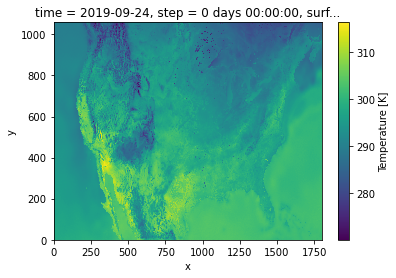

In [43]:
#checking the data with simple plot
check1_land.t.plot()
#need to subset this for ches domain

/home/sreenath/miniconda3/envs/hrrrb/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


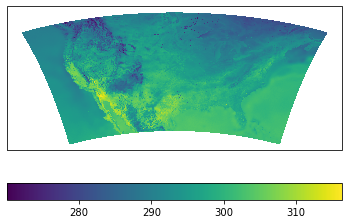

In [49]:
ax = plt.subplot(projection=ccrs.LambertConformal())

dat = check1_land.t

img = ax.pcolormesh(check1_land.longitude, check1_land.latitude, dat, transform=ccrs.LambertConformal())
ax.coastlines()

plt.colorbar(img, ax=ax, orientation='horizontal')

In [108]:
#get the HRRR data projection info from one of the variables
sH = check1_land.t

lc_HRRR_kwargs = {
    'globe' : ccrs.Globe(ellipse='sphere'),
    'central_latitude'   : sH.GRIB_LaDInDegrees,
    'central_longitude'  : sH.GRIB_LoVInDegrees,
    'standard_parallels' : (sH.GRIB_Latin1InDegrees, \
                            sH.GRIB_Latin2InDegrees)}

lc = ccrs.LambertConformal(**lc_HRRR_kwargs)
lc

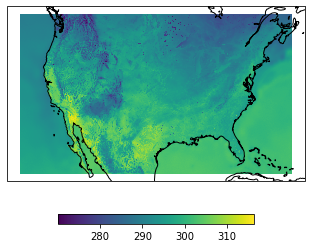

In [59]:
# Now that we have the projection, we can plot the data

ax = plt.subplot(projection=lc)

img = ax.pcolormesh(check1_land.longitude, check1_land.latitude, sH, transform=ccrs.PlateCarree())
ax.coastlines()

plt.colorbar(img, ax=ax, orientation='horizontal', fraction=0.045)

In [60]:
# #extract land sea mask
# # check1_small = xr.open_dataset('hrrr/20190924/small.grib2', engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface'}})
# cfgrib.open_datasets('hrrr/20190924/small.grib2')

In [28]:
# %%bash
# wgrib2 hrrr/20190924/subset_20190924_hrrr.t01z.wrfprsf00.grib2 -small_grib -92.25:-88.28 44.53:47.29 hrrr/20190924/small2.grib2

In [61]:
# check_small = xr.open_dataset('hrrr/20190924/small2.grib2', engine='cfgrib',
# ...     backend_kwargs={'filter_by_keys': {'stepType': 'instant','typeOfLevel': 'surface'}})
# #takes less time!

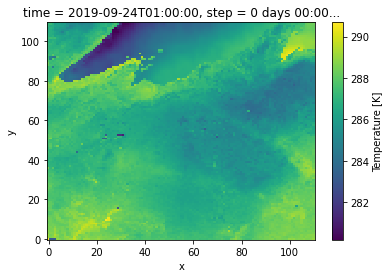

In [7]:
check_small.t.plot()

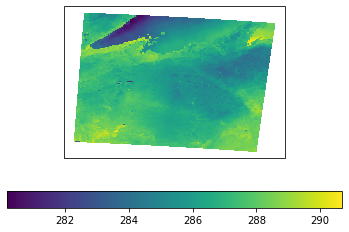

In [135]:
ax = plt.subplot(projection=ccrs.LambertConformal())

dat = check_small.t

img = ax.pcolormesh(check_small.longitude, check_small.latitude, dat, transform=ccrs.LambertConformal())
ax.coastlines()

plt.colorbar(img, ax=ax, orientation='horizontal')

In [136]:
#get the HRRR data projection info from one of the variables
sH = check_small.t

lc_HRRR_kwargs = {
    'globe' : ccrs.Globe(ellipse='sphere'),
    'central_latitude'   : sH.GRIB_LaDInDegrees,
    'central_longitude'  : sH.GRIB_LoVInDegrees,
    'standard_parallels' : (sH.GRIB_Latin1InDegrees, \
                            sH.GRIB_Latin2InDegrees)}

lc = ccrs.LambertConformal(**lc_HRRR_kwargs)
lc

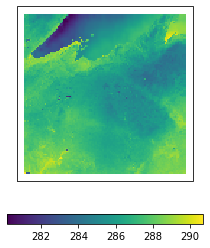

In [137]:

# Now that we have the projection, we can plot the data

ax = plt.subplot(projection=lc)

img = ax.pcolormesh(check_small.longitude, check_small.latitude, sH, transform=ccrs.PlateCarree())
ax.coastlines()

plt.colorbar(img, ax=ax, orientation='horizontal', fraction=0.045)

In [69]:
%%bash
cd hrrr/20190924
ncl_convert2nc small2.grib2 -itime

Processing file: small2.grib2...
 Copyright (C) 1995-2019 - All Rights Reserved
 University Corporation for Atmospheric Research
 NCAR Command Language Version 6.6.2
 The use of this software is governed by a License Agreement.
 See http://www.ncl.ucar.edu/ for more details.
Classic model NetCDF does not support string types, converting initial_time0 to a character array
Dimension 'ncl_strlen_0' will be added


In [66]:
ds = xr.open_dataset('hrrr/20190924/small2.nc')
ds

<xarray.Dataset>
Dimensions:                (initial_time0_hours: 1, lv_DBLL3: 9, lv_HTGL1: 2, lv_ISBL0: 40, lv_TMPL2: 2, xgrid_0: 111, ygrid_0: 110)
Coordinates:
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 2019-09-24T01...
  * lv_TMPL2               (lv_TMPL2) float32 253.0 263.0
  * lv_HTGL1               (lv_HTGL1) float32 10.0 80.0
  * lv_ISBL0               (lv_ISBL0) float32 5e+03 7.5e+03 ... 1e+05 1.013e+05
    gridlat_0              (ygrid_0, xgrid_0) float32 ...
    gridlon_0              (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: lv_DBLL3, xgrid_0, ygrid_0
Data variables:
    TMP_P0_L1_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L100_GLC0       (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L103_GLC0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    SPFH_P0_L100_GLC0      (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    SPFH_P0_L103_GLC0      (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    UGRD_P0_L100_GLC0      (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    UGRD_P0_L103_GLC0      (initial_time0_hours, lv_HTGL1, ygrid_0, xgrid_0) float32 ...
    VGRD_P0_L100_GLC0      (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    VGRD_P0_L103_GLC0      (initial_time0_hours, lv_HTGL1, ygrid_0, xgrid_0) float32 ...
    VVEL_P0_L100_GLC0      (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L1_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L2_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L3_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L4_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L5_GLC0         (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L20_GLC0        (initial_time0_hours, lv_TMPL2, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L100_GLC0       (initial_time0_hours, lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L204_GLC0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L215_GLC0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    HGT_P0_L247_GLC0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    LAND_P0_L1_GLC0        (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    TSOIL_P0_2L106_GLC0    (initial_time0_hours, lv_DBLL3, ygrid_0, xgrid_0) float32 ...
    SOILW_P0_2L106_GLC0    (initial_time0_hours, lv_DBLL3, ygrid_0, xgrid_0) float32 ...
    initial_time0_encoded  (initial_time0_hours) float64 ...
    lv_DBLL3_l1            (lv_DBLL3) float32 ...
    lv_DBLL3_l0            (lv_DBLL3) float32 ...
    gridrot_0              (ygrid_0, xgrid_0) float32 ...
    initial_time0          (initial_time0_hours) |S18 ...
Attributes:
    creation_date:  Tue Feb  9 19:31:36 CST 2021
    NCL_Version:    6.6.2
    system:         Linux DESKTOP-MC9EIMU 4.19.128-microsoft-standard #1 SMP ...
    Conventions:    None
    grib_source:    small2.grib2
    title:          NCL: convert-GRIB-to-netCDF

In [23]:
#checking gridrot for ugrid and vgrid
ds['Vearth'] = np.cos(ds.gridrot_0)*ds.VGRD_P0_L100_GLC0 - np.sin(ds.gridrot_0)*ds.UGRD_P0_L100_GLC0
ds['Vearth']

<xarray.DataArray 'Vearth' (ygrid_0: 110, xgrid_0: 111, lv_ISBL0: 40)>
array([[[-3.2213697e+00, -1.3440185e+00, -4.6626115e+00, ...,
          1.2369048e-02,  3.9886761e-02, -5.4426398e-04],
        [-3.2228334e+00, -1.4136786e+00, -4.6659074e+00, ...,
         -1.1280167e-01, -8.4885910e-02, -6.2912032e-02],
        [-3.2832277e+00, -1.4175107e+00, -4.7350268e+00, ...,
         -1.7903560e-01, -1.5072180e-01, -1.2527698e-01],
        ...,
        [-2.8357031e+00, -3.4929819e+00, -6.4608965e+00, ...,
         -3.3602655e-02,  6.1092174e-01,  6.3888890e-01],
        [-2.8366866e+00, -3.5593696e+00, -6.4670277e+00, ...,
          2.5888205e-02,  6.7883074e-01,  7.0063460e-01],
        [-2.7754788e+00, -3.5635607e+00, -6.4109669e+00, ...,
          9.1586471e-02,  7.4678516e-01,  7.0639670e-01]],

       [[-3.2838566e+00, -1.3442273e+00, -4.6629810e+00, ...,
          7.4755467e-02,  3.9888799e-02,  6.1863981e-02],
        [-3.2853191e+00, -1.4138904e+00, -4.7286835e+00, ...,
          1.1988148e-02, -2.2478897e-02, -5.0509861e-04],
        [-3.2867811e+00, -1.4177241e+00, -4.7354007e+00, ...,
         -5.0776336e-02, -8.4843770e-02, -6.2871359e-02],
...
        [-3.4857814e+00, -3.3230665e+00, -7.0025315e+00, ...,
          3.8078773e-01,  1.0559753e+00,  1.0777609e+00],
        [-3.4873619e+00, -3.3332846e+00, -7.0075212e+00, ...,
          3.8625240e-01,  1.1244164e+00,  1.1462002e+00],
        [-3.4889417e+00, -3.3370581e+00, -7.0125098e+00, ...,
          3.9826640e-01,  1.1994009e+00,  1.2211827e+00]],

       [[-4.0938678e+00, -1.4123278e+00, -3.2460907e+00, ...,
          8.6066544e-01,  8.9577746e-01,  8.5534674e-01],
        [-4.0962310e+00, -1.4785726e+00, -3.2525353e+00, ...,
          9.1934943e-01,  8.9566141e-01,  9.1762650e-01],
        [-4.0949588e+00, -1.5448139e+00, -3.3177392e+00, ...,
          9.1921669e-01,  8.9191115e-01,  9.1387475e-01],
        ...,
        [-3.5481119e+00, -3.3234551e+00, -6.9408822e+00, ...,
          4.4285005e-01,  1.0495088e+00,  1.0091275e+00],
        [-3.5496902e+00, -3.3272045e+00, -6.9394040e+00, ...,
          4.4831434e-01,  1.1179256e+00,  1.0775454e+00],
        [-3.5447688e+00, -3.3309531e+00, -6.9443707e+00, ...,
          4.6033069e-01,  1.1928891e+00,  1.1525096e+00]]], dtype=float32)
Coordinates:
  * lv_ISBL0   (lv_ISBL0) float32 5e+03 7.5e+03 1e+04 ... 1e+05 1.013e+05
    gridlat_0  (ygrid_0, xgrid_0) float32 44.56 44.56 44.56 ... 47.24 47.24
    gridlon_0  (ygrid_0, xgrid_0) float32 -92.46 -92.42 -92.38 ... -87.95 -87.91
Dimensions without coordinates: ygrid_0, xgrid_0